# Problem Solving with Trees-Based Algorithms :  
---
Decision tree is a Supervised learning techning that can be used for both classification and regression problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

### 1.  [Decision Trees for the Classification Problems](#tree1)<br>
### 2.  [Decision Trees for Regression problems](#tree2)<br>

<center>
    <img alt="Machine Learning for Humans, Part 2.3: Supervised Learning III ..." class="n3VNCb" src="https://miro.medium.com/max/1930/0*pZ0pgQT3i-CFPyaf." data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd,gvK6lb;" style="width: 700px; height: 400px; margin: 0px;">

# Library :

In [183]:
library(tree)     
library(ISLR)
library(tidyverse)
library(data.table)
library(funModeling)
library(dplyr)
library(repr)    # --- To resize the plots area
library(caTools) # --- Sample splitting
library(caret)   # --- Confusion matrix
library(MASS)    # --- For Boston data set

<a id = "tree1"></a><br>
# 1. Classification Trees :
---

## Data set : Carseats
<i> We will apply the Classification tree approcah on <b>Carseats</b> data to classify the High sales (encoded variable of continuous feature), if sales > 8 then 'Yes' otherwise 'No' . And this is a data frame with 400 observations on the following variables. Data is present in R environment and can be refer on <a href = https://rdrr.io/cran/ISLR/man/Carseats.html > Carseats: Sales of Child Car Seats </a> . Also it can be download from the <a href = https://www.kaggle.com/huhao05133/carseats> Kaggle. </a></i>
    
### Features Informations :
* Sales : Unit sales (in thousands) at each location

* CompPrice : Price charged by competitor at each location
* Income : Community income level (in thousands of dollars)

* Advertising : Local advertising budget for company at each location (in thousands of dollars)

* Population : Population size in region (in thousands)

* Price : Price company charges for car seats at each site

* ShelveLoc : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* Age : Average age of the local population

* Education : Education level at each location

* Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* US : A factor with levels No and Yes to indicate whether the store is in the US or not

In [192]:
# Loading the data
data = as.data.frame(fread('../input/carseats/Carseats.csv'))

# Top rows of the data
head(data)

# Summary of the data
summary(data)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc              Age       
 Min.   : 10.0   Min.   : 24.0   Length:400         Min.   :25.00  
 1st Qu.:139.0   1st Qu.:100.0   Class :character   1st Qu.:39.75  
 Median :272.0   Median :117.0   Mode  :character   Median :54.50  
 Mean   :264.8   Mean   :115.8                      Mean   :53.32  
 3rd Qu.:398.5   3rd Qu.:131.0                      3rd Qu.:66.00  
 Max.   :509.0   Max.   :191.0                      Max.   :80.00  
   Education       Urban                US           
 Min.   

In [194]:
# Creating the High_sales flag for and define as Y variable
data = data %>% mutate(High_Sales = if_else(Sales > 8,"Yes","No")) 
data = data[,-1]
table(data$High_Sales)


 No Yes 
236 164 

In [195]:
# Converting the required character variables into factors
d1 =  apply(data[,status(data)$type == 'character'],2,as.factor)
data = cbind(data[,status(data)$type != 'character'],d1)
status(data)

variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>
CompPrice,0,0.00,0,0,0,0,integer,73
Income,0,0.00,0,0,0,0,integer,98
Advertising,144,0.36,0,0,0,0,integer,28
Population,0,0.00,0,0,0,0,integer,275
Price,0,0.00,0,0,0,0,integer,101
Age,0,0.00,0,0,0,0,integer,56
Education,0,0.00,0,0,0,0,integer,9
ShelveLoc,0,0.00,0,0,0,0,factor,3
Urban,0,0.00,0,0,0,0,factor,2


<i> We will use the classification tree model for the High_Sales classification/Prediction.

In [103]:
# Building the tree model
class_mod = tree(High_Sales ~.,data = as.data.frame(data))

# Summary of the Model
summary(class_mod)


Classification tree:
tree(formula = High_Sales ~ ., data = as.data.frame(data))
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

<i> Therefore from above model summary we have 8 significant variables used for node splitting and no fo terminals node is 27. And also we have the 9% trainning/ misclassification error rate with residual mean deviance is 0.4575. 
    
### Visualization of Classification Tree :

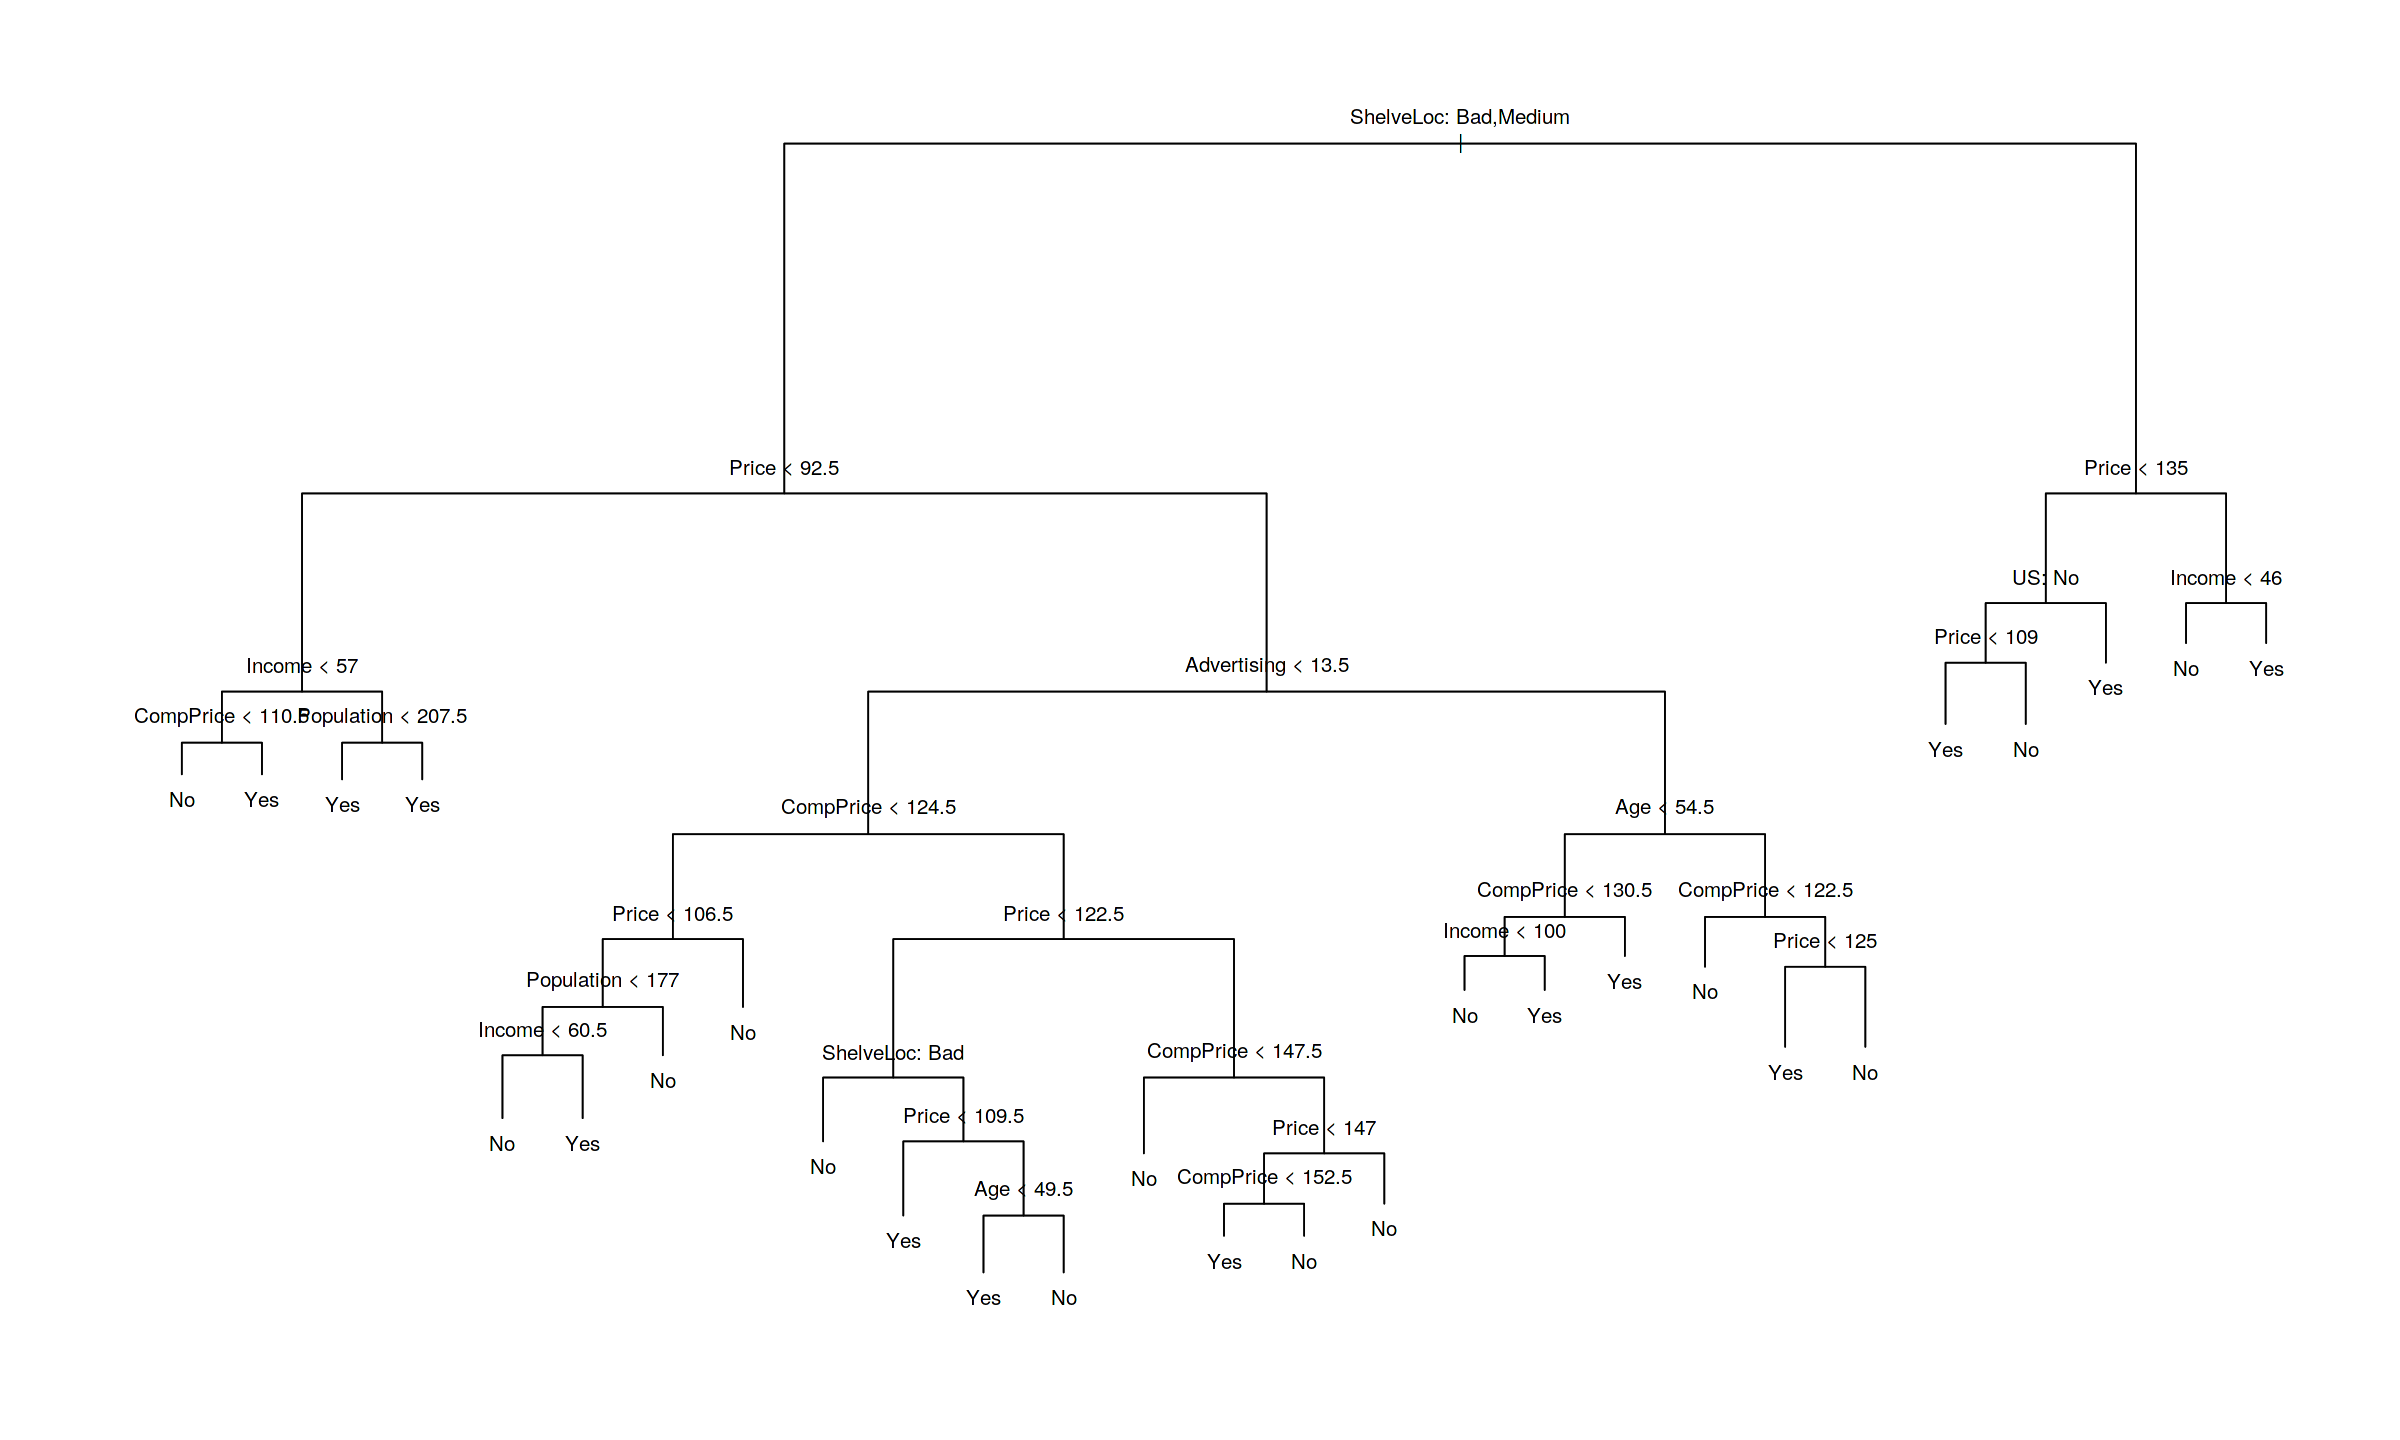

In [196]:
# Resize the Plot area
options(repr.plot.width = 20 ,repr.plot.height = 12)

# To plot the tree structure
plot(class_mod)

# Will add the nodes lables with text() function and will use pretty = 0 ( to instructs R to include the category names rather than having simple displaying a letter)
text(class_mod,pretty = 0)

<i> From above tree flow, we can have our inferences like the Shelving location is most significant variables as it differentiates Good location from the bad and medium one at first split. And based on the ternimal node and pipeline, we can have rule to reaching those group of population.</i>

<b> To Evaluate the performance of the model we will build a training model and check its performance on the test data set and for which first we have to split the data into two parts train and test. 

In [105]:
# Setting the fixed state for the random number generation
set.seed(20)
sample = sample(1:nrow(data),200)

#test data set
class_test = data[-sample,]
High_test = class_test$High_Sales

# Model Building on train data set
class_mod1 = tree(High_Sales ~ .,data = data,subset = sample)

# Prediction on test data set for the class
class_pred_test = predict(class_mod1,class_test,type = 'class')

# Making Confusion matrix
caret::confusionMatrix(class_pred_test,High_test,positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  84  32
       Yes 32  52
                                         
               Accuracy : 0.68           
                 95% CI : (0.6105, 0.744)
    No Information Rate : 0.58           
    P-Value [Acc > NIR] : 0.002334       
                                         
                  Kappa : 0.3432         
                                         
 Mcnemar's Test P-Value : 1.000000       
                                         
            Sensitivity : 0.6190         
            Specificity : 0.7241         
         Pos Pred Value : 0.6190         
         Neg Pred Value : 0.7241         
             Prevalence : 0.4200         
         Detection Rate : 0.2600         
   Detection Prevalence : 0.4200         
      Balanced Accuracy : 0.6716         
                                         
       'Positive' Class : Yes            
                                         

<i> From above confusion matrix report, we have 68% accuraccy of the model on test data i.e 68% of the test values are correctly classified. And misclassification rate is around 32%.</i>


<b> Now, we can check, if the Pruning of the tree will make any improvement on the model performance with cross validation.

In [110]:
# Setting the state of the random number generation
set.seed(100)

# Here, We are using FUN = prune.misclass in order to indicate that we want the classification error rate to guide the cross-validation and pruning process, by default it is deviance.
class_cv = cv.tree(class_mod1,FUN = prune.misclass)

# Names of parameters
names(class_cv)

# Full details of the parameters
class_cv

[1] "size"   "dev"    "k"      "method"

$size
[1] 19 17 13 11  9  7  5  4  1

$dev
[1] 53 52 55 52 50 54 55 55 81

$k
[1]     -Inf  0.00000  0.50000  1.00000  1.50000  2.00000  4.00000  6.00000
[9] 12.66667

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

### Plots : The Error rate V/s size of terminal node and alpha parameter (cost complexity).

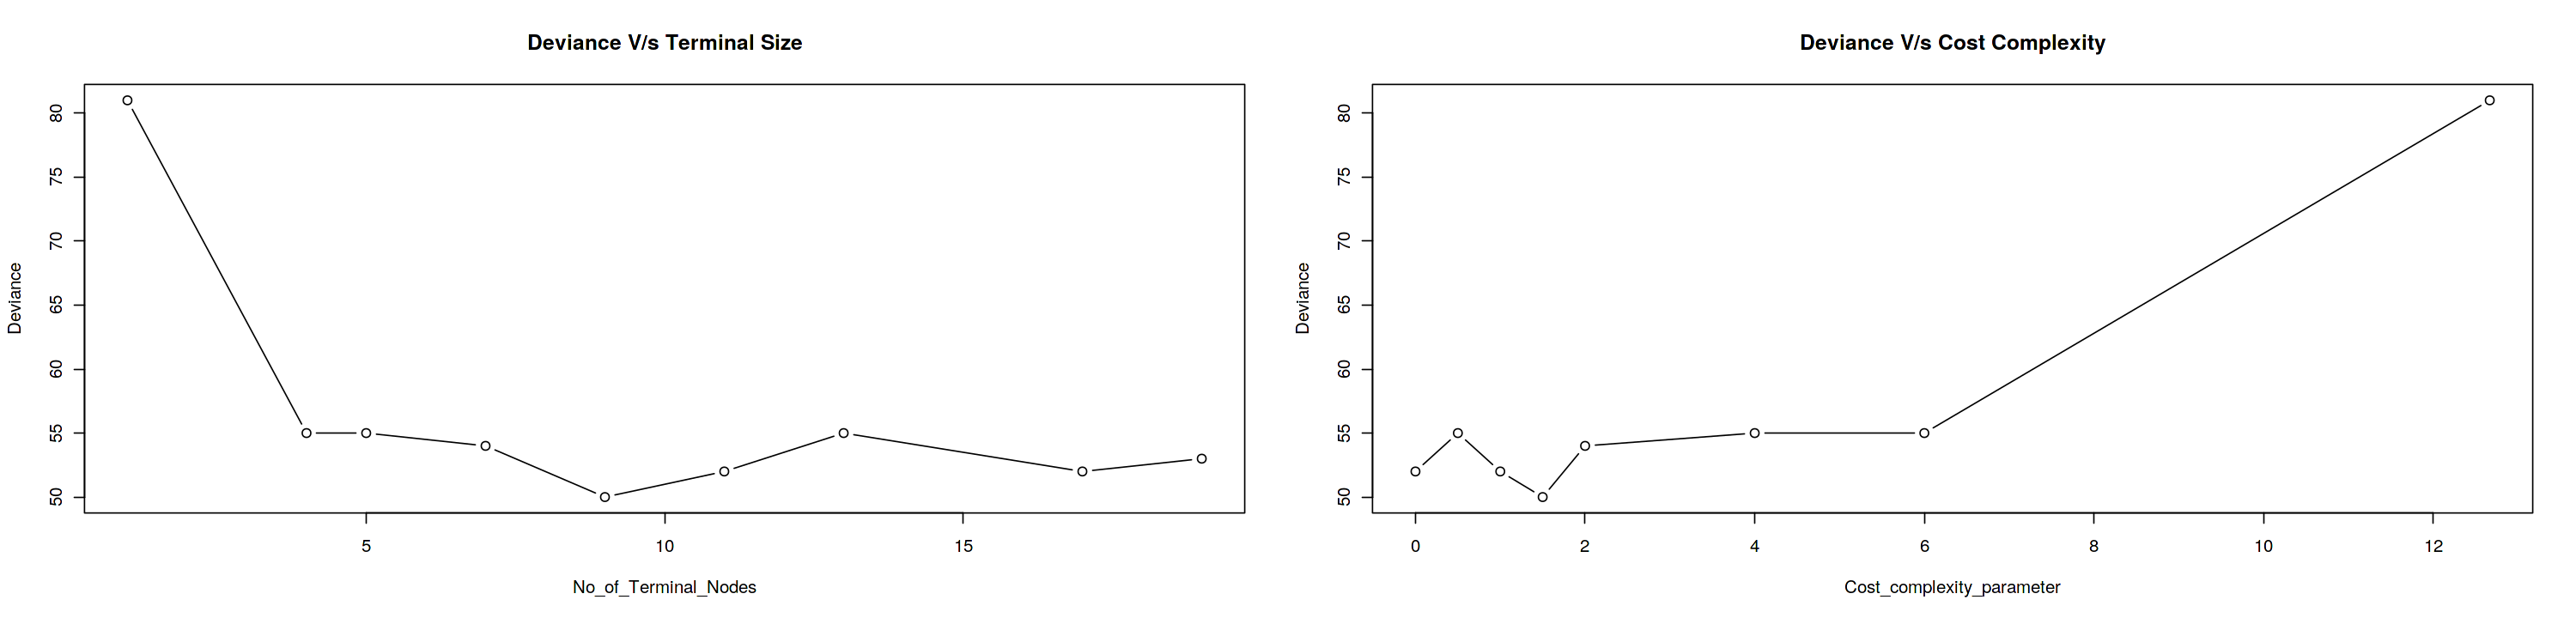

In [113]:
# Resize the plots area
options(repr.plot.width = 25,repr.plot.height = 6)

# Splitting the graph area into two parts
par(mfrow = c(1,2))

# 1. Plot Error rate v/s size
plot(class_cv$size,class_cv$dev,type = 'b',xlab= 'No_of_Terminal_Nodes',ylab = 'Deviance',main = 'Deviance V/s Terminal Size')

# 2. Plot : Error rate V/s K
plot(class_cv$k,class_cv$dev,type = 'b',xlab= 'Cost_complexity_parameter',ylab = 'Deviance',main = 'Deviance V/s Cost Complexity')

<i> From above cross validation reports, we have the size of the terminal nodes with the deviance ( Cross-validation Error), and in our case we have the tree with 9 terminal nodes results in the lowest cross-validation error rate, with 50 cross- validation errors and alpha parameter is 1.5 (Cost Complexity Parameter).</i>

### We can try to prune the tree model with best terminal node size.

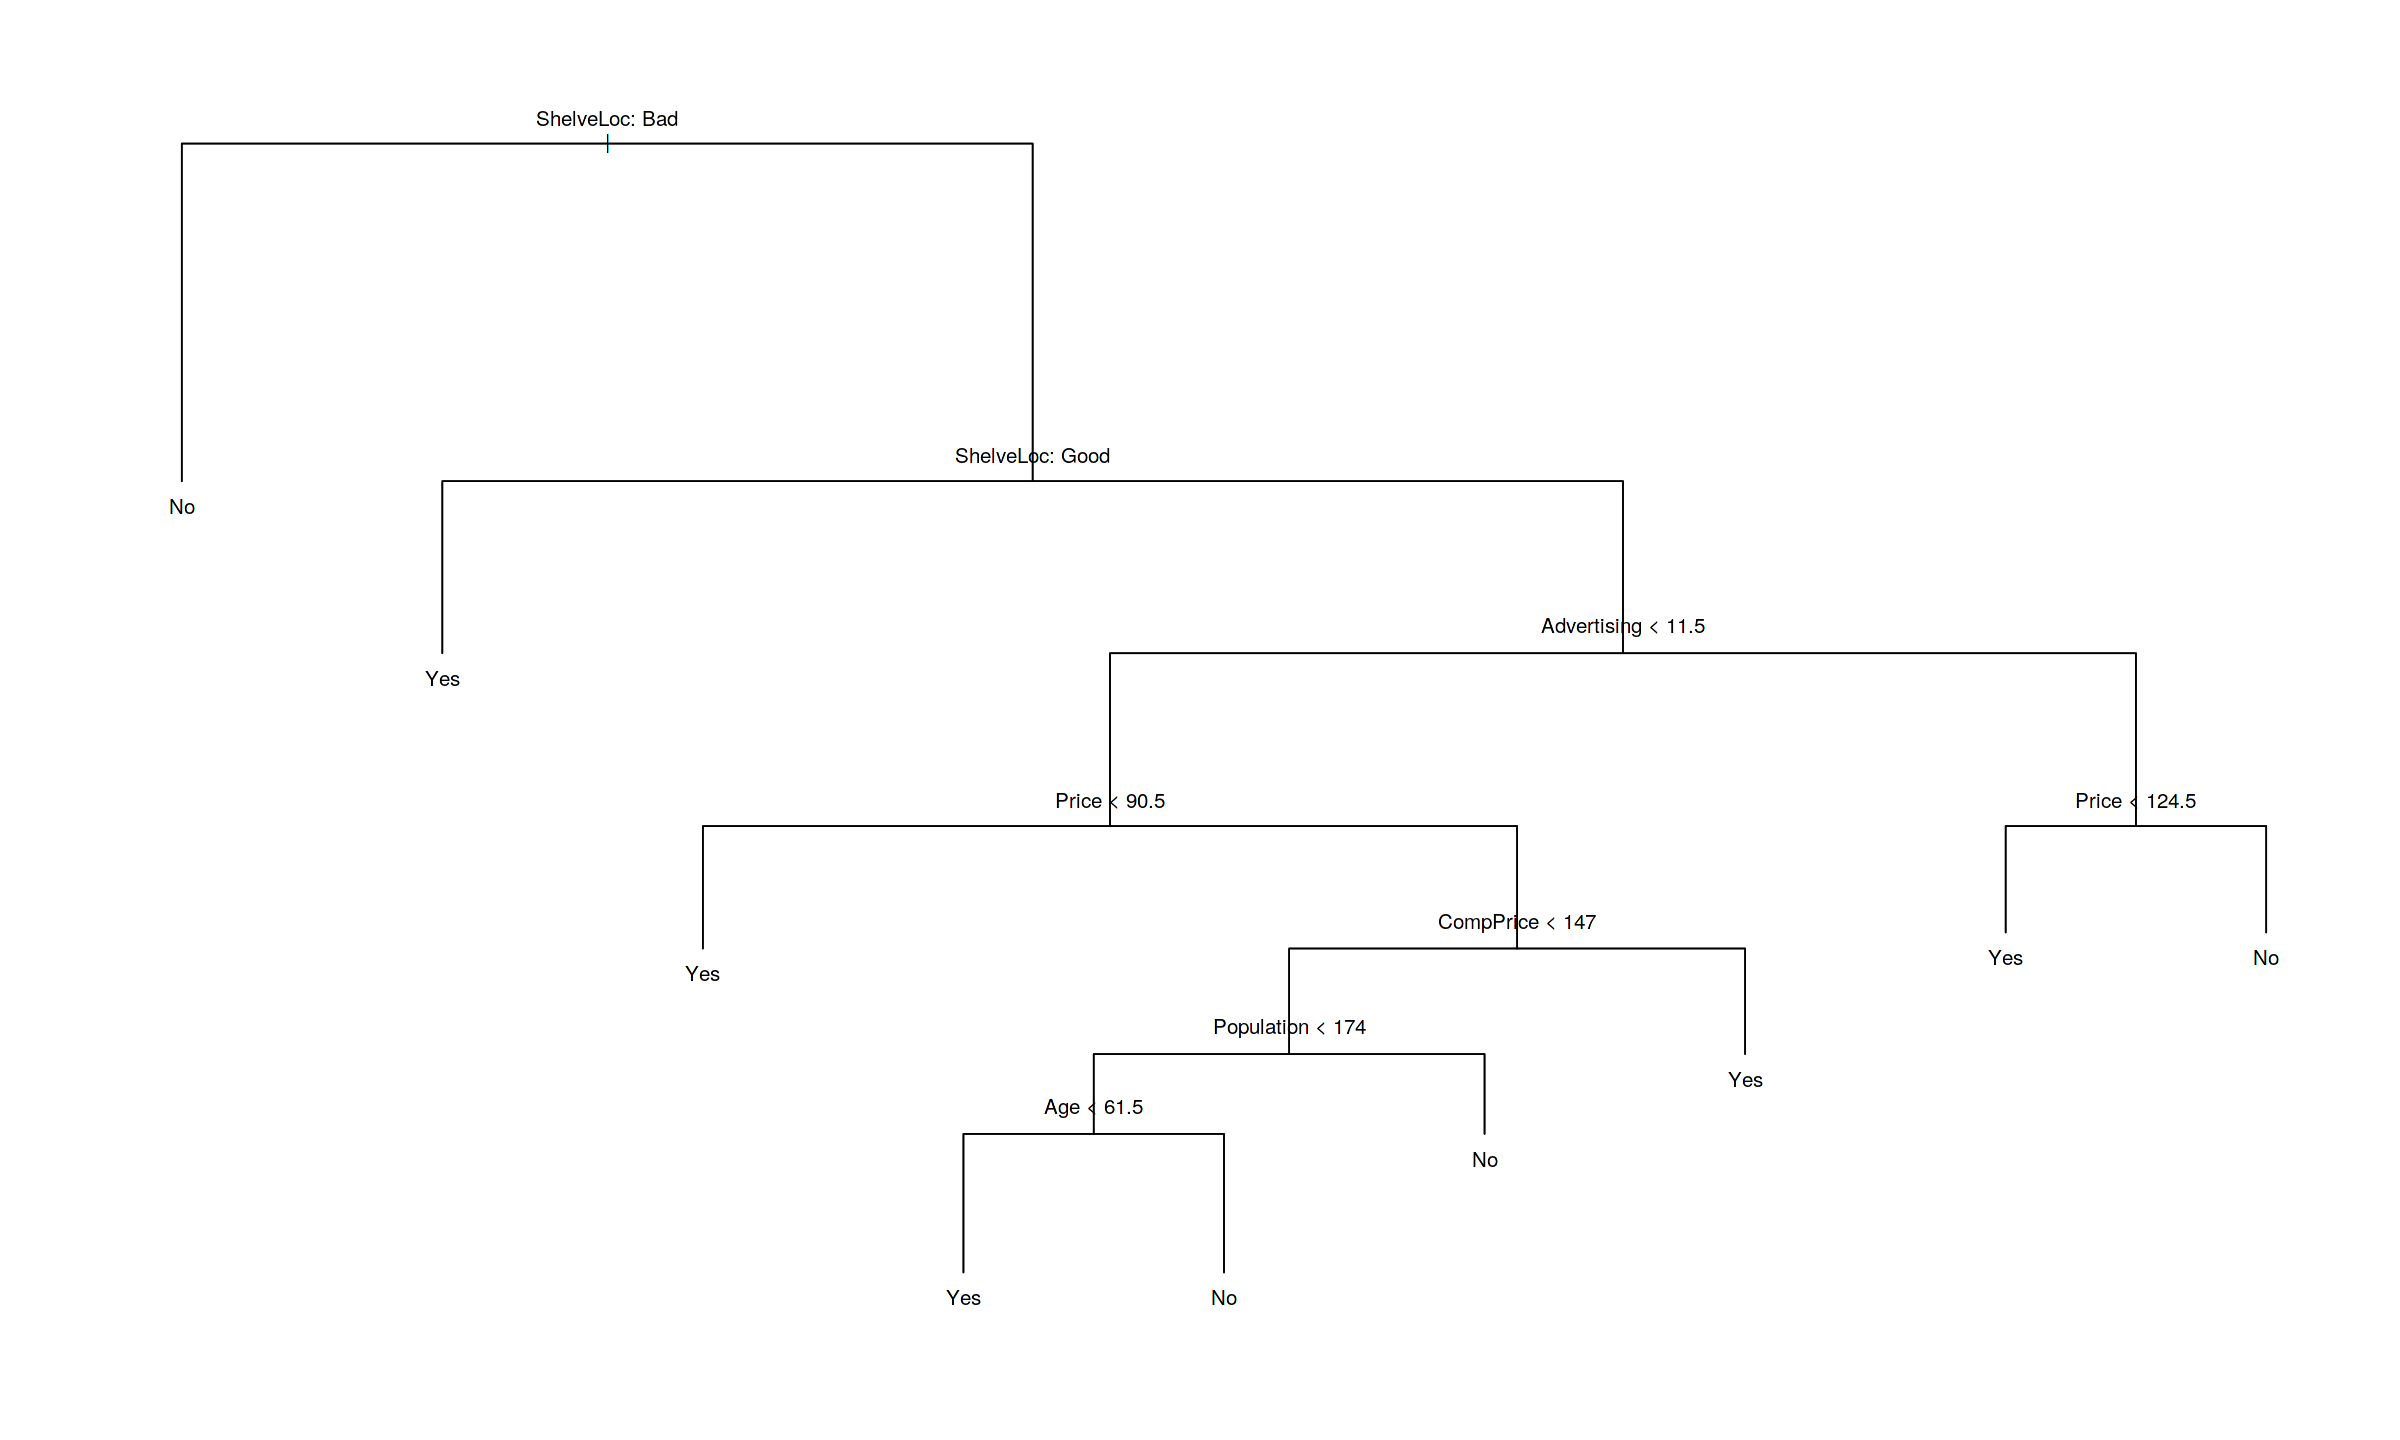

In [197]:
# For Pruning the model we can use prune.misclass() function.
class_prune = prune.misclass(class_mod1,best = 9)

# Plotting the tree structure with lables
options(repr.plot.width = 20 ,repr.plot.height = 12)
plot(class_prune)
text(class_prune,pretty=0)

 <i>So,  We are having a tree model with the 9 terminal node as shown in above plot and here we have some of significant variables for splitting the tree into sub tree. And let's check the performance of this model on the testing data set. 

In [115]:
# Predicting for the test data set
class_pred_test1 = predict(class_prune,class_test,type = 'class')

# Confusion matrix for the model performance evaluation
confusionMatrix(class_pred_test1,High_test,positive = 'Yes')

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  77  21
       Yes 39  63
                                          
               Accuracy : 0.7             
                 95% CI : (0.6314, 0.7626)
    No Information Rate : 0.58            
    P-Value [Acc > NIR] : 0.0003087       
                                          
                  Kappa : 0.4019          
                                          
 Mcnemar's Test P-Value : 0.0281858       
                                          
            Sensitivity : 0.7500          
            Specificity : 0.6638          
         Pos Pred Value : 0.6176          
         Neg Pred Value : 0.7857          
             Prevalence : 0.4200          
         Detection Rate : 0.3150          
   Detection Prevalence : 0.5100          
      Balanced Accuracy : 0.7069          
                                          
       'Positive' Class : Yes             
                                 

<i> We are having the model accuracy as 70% which means that model is able to seperate the High_sales category with around 70% of accuracy. And we can see that with this pruning approcah, we are getting some hike in the model accuracy. So pruning the tree not only has pruning process produced a more interpretable tree, but it has also improved the classification accuracy. </i>

<a id = "tree2"></a><br>
# 2. Regression Trees :
---
### Data Set : The Boston Housing Dataset
<i> This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases and 14 columns. Data description is present at <a href = https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html > The Boston Housing Dataset</i>
    
We will predict the median value of owner-occupied homes with the help of the decision tree Regression model.

    
### Features Informations :
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per (10,000 dollar)
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's



In [122]:
# Library for the Boston data set
library(MASS)

# Loading the Boston Data set
data_reg = Boston

# Top rows of the data set
head(data_reg)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [123]:
# Summary of the data set
summary(data_reg)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [198]:
# Status of the data and variables
status(data_reg)

variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>
crim,0,0.0000000,0,0,0,0,numeric,504
zn,372,0.7351779,0,0,0,0,numeric,26
indus,0,0.0000000,0,0,0,0,numeric,76
chas,471,0.9308300,0,0,0,0,integer,2
nox,0,0.0000000,0,0,0,0,numeric,81
rm,0,0.0000000,0,0,0,0,numeric,446
age,0,0.0000000,0,0,0,0,numeric,356
dis,0,0.0000000,0,0,0,0,numeric,412
rad,0,0.0000000,0,0,0,0,integer,9


<i> Now, we will try to fit a regression tree to this data set and for it will divide the data into train and test data set</i>

In [149]:
# Setting the state of the random number generation
set.seed(1)
sample1 = sample.split(data_reg,SplitRatio = 0.5)

# train and test data set
train_reg = data_reg[sample1,]
train_y_reg = train_reg$medv
test_reg = data_reg[!sample1,]
test_y_reg = test_reg$medv

# Model on training data set
reg_model = tree(medv ~ .,data = data_reg, subset = sample1)

# Summaries the model
summary(reg_model)

# Prediction on the test data set
test_y_pred = predict(reg_model,newdata = test_reg)
caret::RMSE(test_y_pred,test_y_reg)


Regression tree:
tree(formula = medv ~ ., data = data_reg, subset = sample1)
Variables actually used in tree construction:
[1] "rm"      "lstat"   "crim"    "nox"     "ptratio"
Number of terminal nodes:  9 
Residual mean deviance:  13.64 = 3341 / 245 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-17.5400  -2.0460  -0.1841   0.0000   2.1500  15.9400 

[1] 4.895817

<i> From above model summary report, we can see that only 5 variables are used to construct the tree with 9 terminal node and the residual mean deviance for the model on the training is 13.64 . And RMSE on the test data is 4.89 </i>

### Visualization of the regression tree:


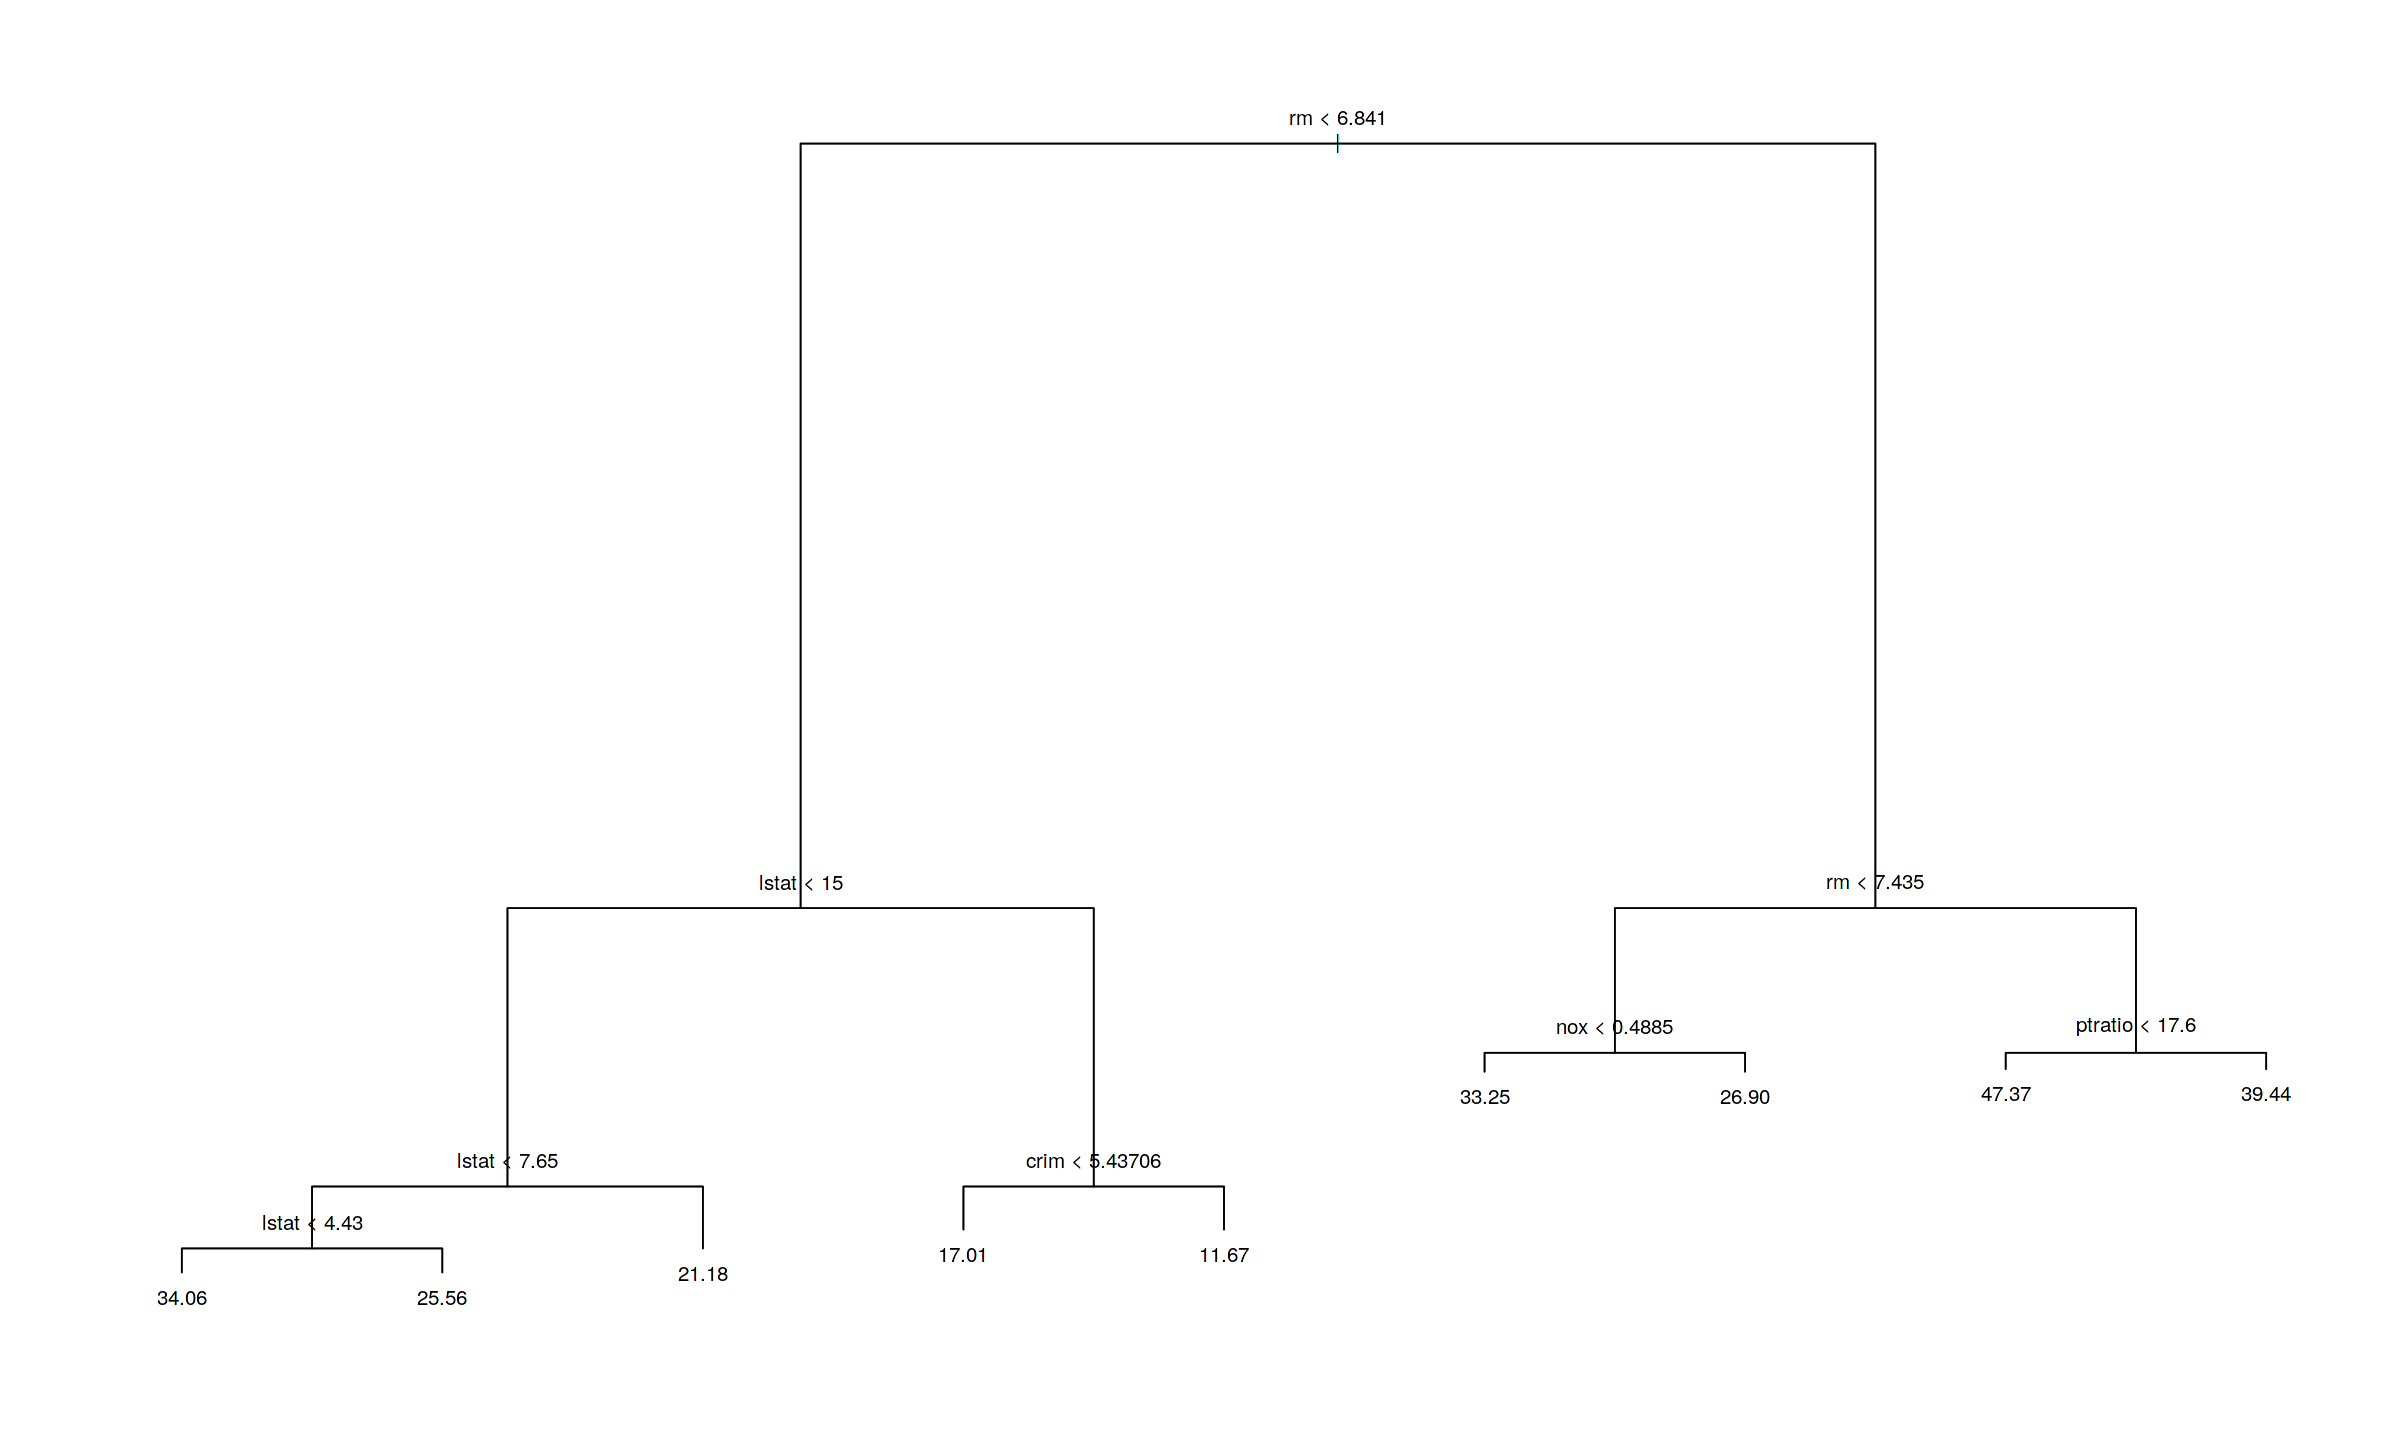

In [130]:
# Plotting the Regression tree;
plot(reg_model)
text(reg_model,pretty=0)

<i> From above tree structure, there are 5 significant variables and it is model with 9 terminal nodes.</i>

<b> Now we can check if the pruning of the tree is making any sense with cross validation methodology.

$size
[1] 9 8 7 6 5 4 3 2 1

$dev
[1]  6583.581  6599.086  6414.610  6495.656  7309.649  8038.593  8806.093
[8] 13867.698 21313.548

$k
[1]       -Inf   216.3156   250.2776   317.3195   569.3069   818.9113  1911.1950
[8]  3678.6924 10105.2060

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

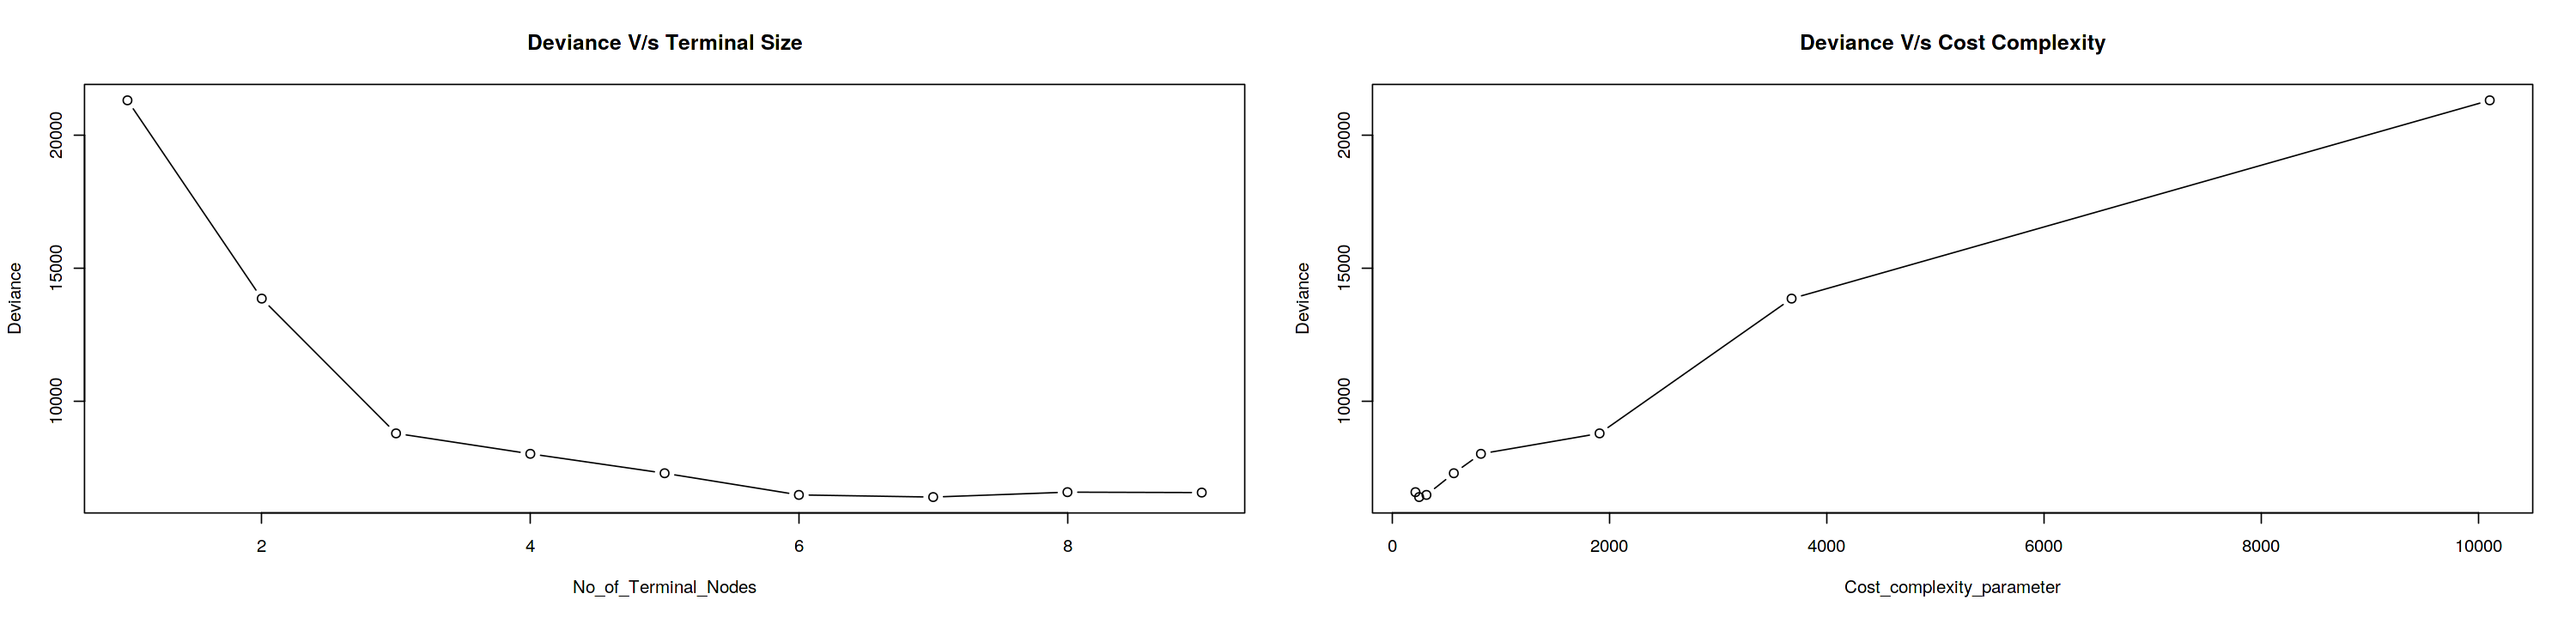

In [168]:
set.seed(101)
# cross validation :
reg_cv = cv.tree(reg_model)
reg_cv
# plotting the dev and the no of terminal node size
options(repr.plot.width = 25,repr.plot.height = 6)

# Splitting the Graph Area
par(mfrow = c(1,2))

# 1. Plot Error rate v/s size
plot(reg_cv$size,reg_cv$dev,type = 'b',xlab= 'No_of_Terminal_Nodes',ylab = 'Deviance',main = 'Deviance V/s Terminal Size')

# 2. Plot : Error rate V/s K
plot(reg_cv$k,reg_cv$dev,type = 'b',xlab= 'Cost_complexity_parameter',ylab = 'Deviance',main = 'Deviance V/s Cost Complexity')

<i> Pruning the tree with the terminal node size 7 because the deviance is low at this point as per our cross validation report.

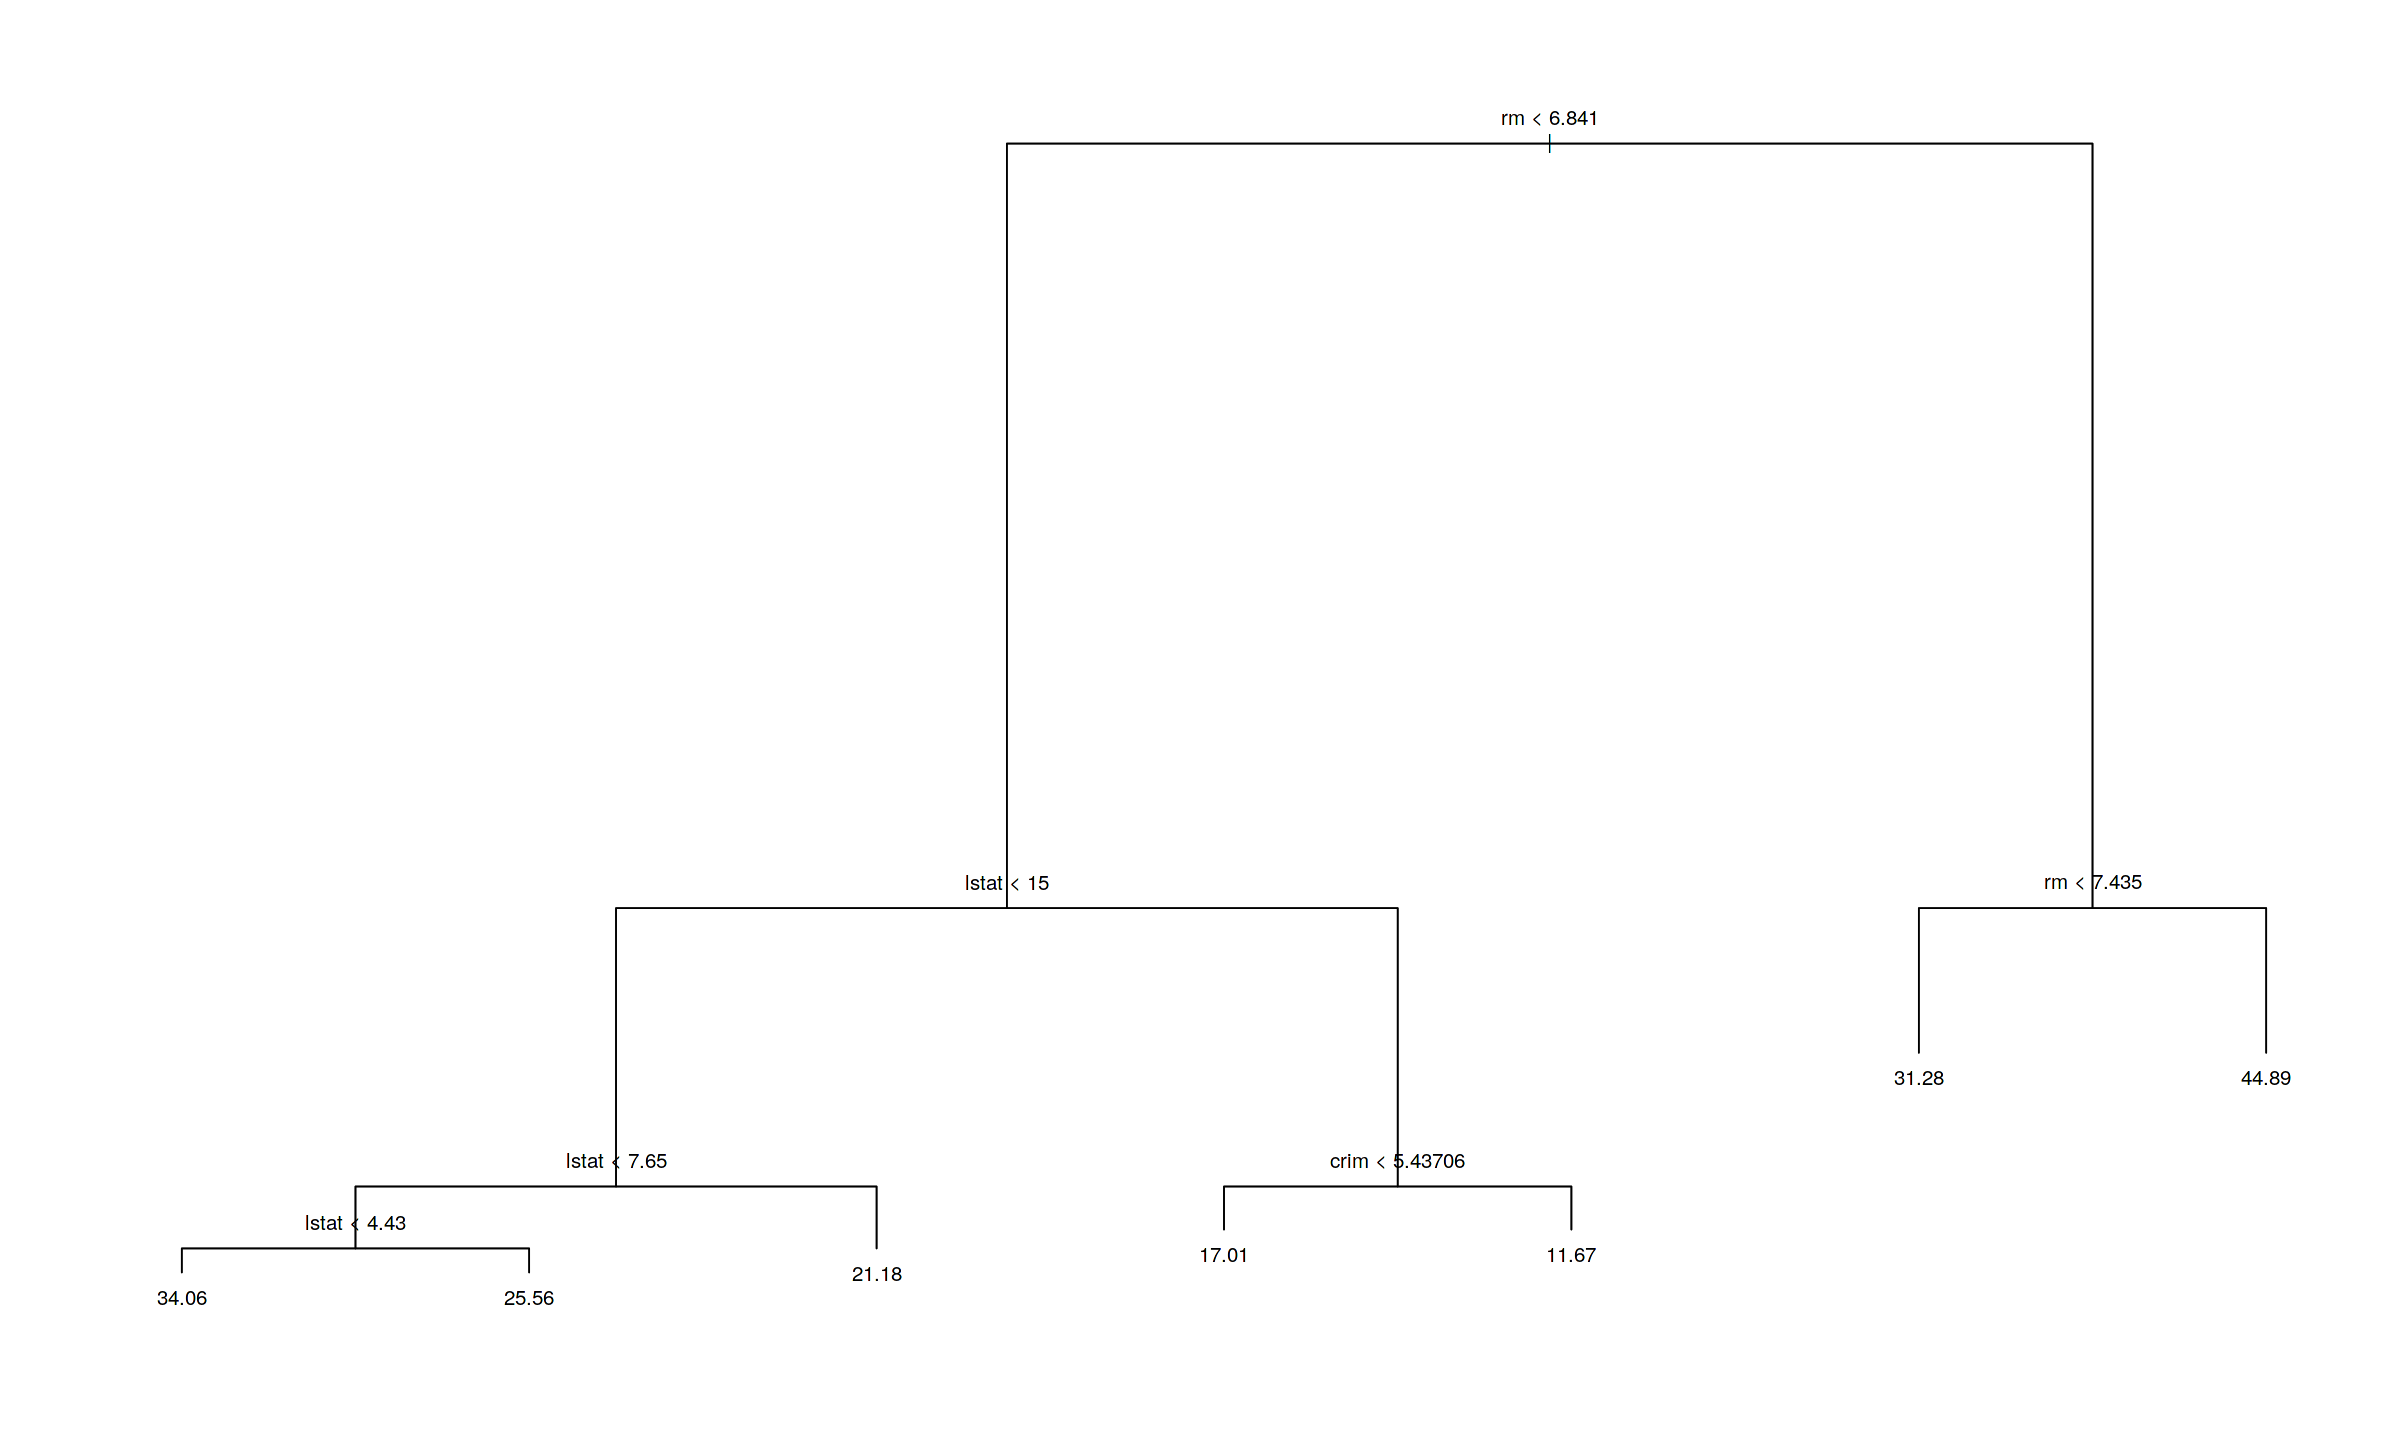

In [175]:
# Pruning Tree model :
reg_prune = prune.tree(reg_model,best = 7)

# Plotting the prune tree
options(repr.plot.width = 20 ,repr.plot.height = 12)
plot(reg_prune)
text(reg_prune,pretty = 0)

In [176]:
# Testing the performance of this model on the test data set:
test_y_pred_new = predict(reg_prune,newdata = test_reg)
caret::RMSE(test_y_pred_new,test_y_reg)

[1] 4.87388

<i> So, we are having the small changed RMSE on the test data set after pruning the tree from terminal size 9 to 7. Therefore pruning of the tree make model perform better on test data and also increase the interpretablity of it on the test in this case.